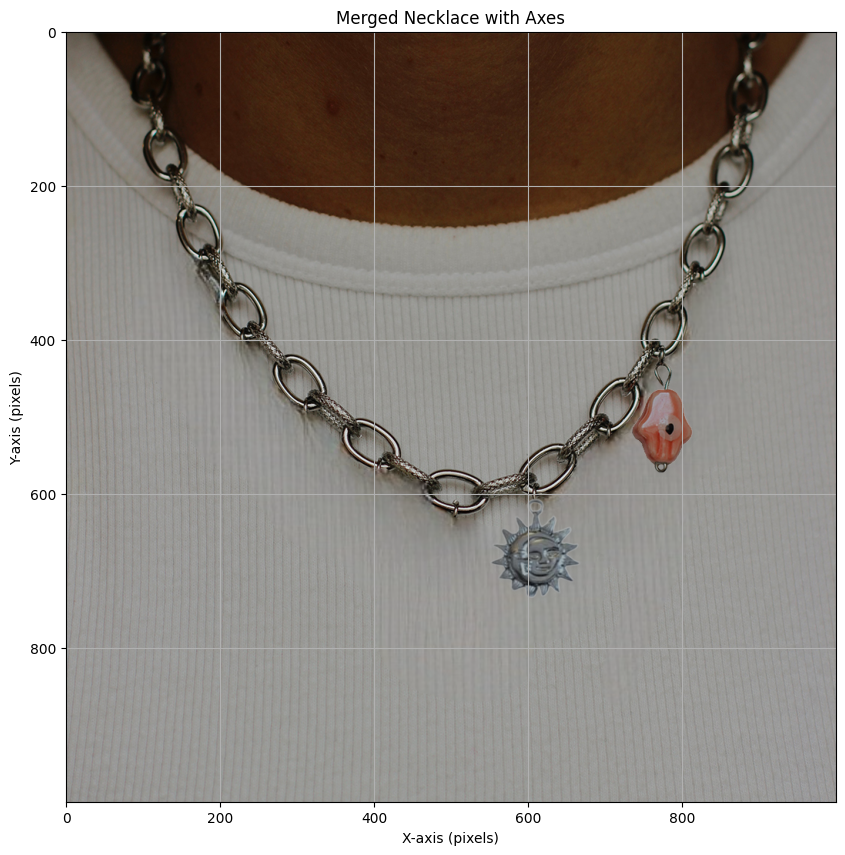

Successfully saved merged image to pics/output/final_necklace


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFilter, ImageEnhance

def prepare_charm(charm_image, resize_factor=0.98, is_metallic=False):
    """
    Prepare a charm image by applying resizing, shadow, and visual effects
    
    Parameters:
    charm_image (PIL.Image): The charm image to process
    resize_factor (float): Factor to resize the charm (default 0.98)
    
    Returns:
    tuple: (processed charm image, shadow image)
    """
    # Convert to RGBA if not already
    charm = charm_image.convert('RGBA')
    
    # Resize handling remains the same
    charm_width, charm_height = charm.size
    new_width = int(charm_width * resize_factor)
    new_height = int(charm_height * resize_factor)
    charm = charm.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    # Enhanced metallic processing
    if is_metallic:
        # More aggressive brightness and contrast adjustment for metallic items
        enhancer = ImageEnhance.Brightness(charm)
        charm = enhancer.enhance(0.85)  # Reduce brightness by 15%
        
        enhancer = ImageEnhance.Contrast(charm)
        charm = enhancer.enhance(0.80)  # Reduce contrast by 20%
        
        # Add a slight cool tint to match the chain's silver tone
        data = charm.getdata()
        new_data = []
        for item in data:
            r, g, b, a = item
            # Adjust color balance for silver
            r = min(255, int(r * 0.95))  # Reduce red
            g = min(255, int(g * 0.97))  # Slightly reduce green
            b = min(255, int(b * 0.98))  # Slightly reduce blue
            new_data.append((r, g, b, a))
        charm.putdata(new_data)
    else:
        # Original processing for non-metallic charms
        enhancer = ImageEnhance.Brightness(charm)
        charm = enhancer.enhance(0.95)
        
        enhancer = ImageEnhance.Contrast(charm)
        charm = enhancer.enhance(0.92)
    
    # Shadow processing
    shadow = charm.copy()
    shadow_data = shadow.getdata()
    new_data = [(0, 0, 0, int(alpha * 0.12)) for (r, g, b, alpha) in shadow_data]  # Even softer shadow
    shadow.putdata(new_data)
    shadow = shadow.filter(ImageFilter.GaussianBlur(radius=2.5))
    
    # Final charm processing
    charm = charm.filter(ImageFilter.GaussianBlur(radius=0.2))  # Slightly sharper edges
    
    return charm, shadow

def merge_charms_with_necklace(necklace_path, charm_config, output_path):
    """
    Merge multiple charms with a necklace base image
    
    Parameters:
    necklace_path (str): Path to the base necklace image
    charm_config (list): List of dictionaries containing charm configurations
                        Each dict should have:
                        - 'path': path to charm image
                        - 'position': (x,y) tuple for charm position
    output_path (str): Path to save the final merged image
    """
    try:
        # Open the base necklace image
        necklace = Image.open(necklace_path).convert('RGBA')
        
        # Create a new blank image with transparency
        final_image = Image.new('RGBA', necklace.size, (0, 0, 0, 0))
        final_image.paste(necklace, (0, 0))
        
        # Add each charm according to configuration
        for charm_spec in charm_config:
            charm_path = charm_spec['path']
            x_position, y_position = charm_spec['position']
            is_metallic = charm_spec.get('is_metallic', False)
            
            charm_img = Image.open(charm_path).convert('RGBA')
            charm, shadow = prepare_charm(charm_img, is_metallic=is_metallic)
            
            # Add shadow with offset
            shadow_x = x_position + 4
            shadow_y = y_position + 4
            final_image.paste(shadow, (shadow_x, shadow_y), shadow)
            
            # Add charm
            final_image.paste(charm, (x_position, y_position), charm)
        
        # Display with matplotlib
        final_array = np.array(final_image)
        plt.figure(figsize=(10, 10))
        plt.imshow(final_array)
        plt.axis('on')
        plt.grid(True)
        plt.title('Merged Necklace with Axes')
        plt.xlabel('X-axis (pixels)')
        plt.ylabel('Y-axis (pixels)')
        plt.show()
        
        # Save the final image
        output_file = output_path + "final_necklace"
        
        # Save PNG with transparency
        final_image.save(output_file + ".png", 'PNG')
        # Convert to RGB before saving as JPEG
        rgb_image = final_image.convert('RGB')
        rgb_image.save(output_file + ".jpg", 'JPEG')
        
        print(f"Successfully saved merged image to {output_file}")
    except Exception as e:
        print(f"Error: {e}")
# Example usage
necklace_path = "pics/input/background-empty.png"
output_path = "pics/output/"

# Example charm configuration
charm_config = [
    {
        'path': "pics/input/charm-1.png",
        'position': (728, 405),
        'is_metallic': False  # For the sun charm
    },
    {
        'path': "pics/input/charm-2.png", 
        'position': (545, 600),
        'is_metallic': True  # For the hamsa charm
    }
]

# Create the merged necklace with multiple charms
merge_charms_with_necklace(necklace_path, charm_config, output_path)

# Example with different charm configuration
# charm_config = [
#     {'path': "pics/input/charm-1.png", 'position': (780, 300)},
#     {'path': "pics/input/charm-2.png", 'position': (680, 300)},
#     {'path': "pics/input/charm-3.png", 'position': (880, 300)}
# ]
# merge_charms_with_necklace(necklace_path, charm_config, output_path)
